<h1 style="text-align:center;"> IBM Applied Data Science Capstone Project </h1>
<h2 style="text-align:center;"> "Car Accident Severity Prediction" </h2>
<h3 style="text-align:center;"> Submission by:<a href="www.linkedin.com/in/tukait13"> Sankhadeep Bhowmick</a></h3>

This project aims to build a Machine Learning model using historical data on collisions in the city of Seattle, WA to predict the severity of future accidents.

In [87]:
import pandas as pd
import numpy as np

In [88]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Data Acquisition

The collisions data is recorded by Seattle Department of Transportation, Traffic Management Division, Traffic Records Group and maintained by ArcGIS and can be found in the Kaggle dataset <a href = "https://www.kaggle.com/jonleon/seattle-sdot-collisions-data"> here </a> 

The dataset has been downloaded and saved to local.

# Data Understanding

In [89]:
# reading the data into a pandas dataframe

df_coll = pd.read_csv("Collisions.csv")
df_coll.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [90]:
df_coll.shape

(221266, 40)

In [91]:
df_coll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213797 non-null  float64
 1   Y                213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT         221266 non-null  int6

**The locations of the accidents can be visualized on a map using the lattitude `Y` and longitude `X` columns**

In [92]:
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = df_coll[['Y', 'X']][df_coll['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [93]:
df_coll.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [94]:
df_coll['ADDRTYPE'].value_counts().to_frame('Count')

,Count
Block,144857
Intersection,71823
Alley,874


In [95]:
df_coll['SEVERITYCODE'].value_counts().to_frame('Count')

,Count
1,137485
2,58698
0,21635
2b,3098
3,349


In [96]:
df_coll['COLLISIONTYPE'].value_counts().to_frame('Count')

,Count
Parked Car,48455
Angles,35469
Rear Ended,34624
Other,24528
Sideswipe,18855
Left Turn,14082
Pedestrian,7654
Cycles,5911
Right Turn,3008
Head On,2181


In [97]:
df_coll['PERSONCOUNT'].describe()

count    221266.000000
mean          2.226230
std           1.470364
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: PERSONCOUNT, dtype: float64

In [98]:
df_coll['PEDCOUNT'].describe()

count    221266.000000
mean          0.038103
std           0.201745
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [99]:
df_coll['PEDCYLCOUNT'].describe()

count    221266.000000
mean          0.027293
std           0.164345
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

In [100]:
df_coll['VEHCOUNT'].describe()

count    221266.000000
mean          1.728544
std           0.831224
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: VEHCOUNT, dtype: float64

In [101]:
df_coll['INJURIES'].describe()

count    221266.000000
mean          0.373844
std           0.732086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          78.000000
Name: INJURIES, dtype: float64

In [102]:
df_coll['SERIOUSINJURIES'].describe()

count    221266.000000
mean          0.015149
std           0.157908
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          41.000000
Name: SERIOUSINJURIES, dtype: float64

In [103]:
df_coll['FATALITIES'].describe()

count    221266.000000
mean          0.001681
std           0.044562
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: FATALITIES, dtype: float64

In [104]:
df_coll['JUNCTIONTYPE'].value_counts().to_frame('Count')

,Count
Mid-Block (not related to intersection),101579
At Intersection (intersection related),69117
Mid-Block (but intersection related),24402
Driveway Junction,11495
At Intersection (but not related to intersection),2495
Ramp Junction,190
Unknown,21


In [105]:
df_coll.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [106]:
df_coll['INATTENTIONIND'].value_counts().to_frame('Count')

,Count
Y,30188


In [107]:
df_coll['UNDERINFL'].value_counts().to_frame('Count')

,Count
N,103482
0,81676
Y,5399
1,4230


In [108]:
df_coll['WEATHER'].value_counts().to_frame('Count')

,Count
Clear,114361
Raining,34021
Overcast,28508
Unknown,15131
Snowing,919
Other,853
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


In [109]:
df_coll['ROADCOND'].value_counts().to_frame('Count')

,Count
Dry,128171
Wet,48715
Unknown,15131
Ice,1231
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


In [110]:
df_coll['LIGHTCOND'].value_counts().to_frame('Count')

,Count
Daylight,119166
Dark - Street Lights On,50053
Unknown,13523
Dusk,6076
Dawn,2599
Dark - No Street Lights,1573
Dark - Street Lights Off,1236
Other,244
Dark - Unknown Lighting,20


In [111]:
df_coll['SPEEDING'].value_counts().to_frame('Count')

,Count
Y,9913


In [112]:
df_coll['HITPARKEDCAR'].value_counts().to_frame('Count')

,Count
N,209290
Y,11976


# Data cleaning / Data wrangling

**Dropping the columns that are irrelevant to our final goal**

In [113]:
df_coll.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [114]:
df_coll_rel = df_coll.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', \
                            'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'INJURIES', \
                            'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'SDOT_COLCODE','SDOT_COLDESC', \
                            'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', \
                            'CROSSWALKKEY', 'HITPARKEDCAR'],axis=1)

df_coll_rel.head(5) # The relevant dataframe

,X,Y,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.386772,47.564720,Intersection,2,2,1,0,1,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
1,-122.341806,47.686934,Intersection,2,4,0,0,2,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN
2,-122.374899,47.668666,Block,1,4,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
3,-122.300758,47.683047,Intersection,1,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
4,-122.313053,47.567241,Block,0,0,0,0,0,Mid-Block (but intersection related),NaN,NaN,NaN,NaN,NaN,NaN


**We would also drop the `X` and `Y` coordinates as we want our model to be independent of the location of the accidents, rather we would keep the `ADDRTYPE` and `JUNCTIONTYPE` columns to denote the properties of the location where the accidents took place**

In [115]:
df_coll_rel.drop(['X', 'Y'],axis=1, inplace = True)
df_coll_rel.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,2,1,0,1,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
1,Intersection,2,4,0,0,2,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN
2,Block,1,4,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
3,Intersection,1,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
4,Block,0,0,0,0,0,Mid-Block (but intersection related),NaN,NaN,NaN,NaN,NaN,NaN


**Checking for missing values in the relevant dataframe and dealing with them**

In [116]:
df_coll_rel.isnull().sum()

ADDRTYPE            3712
SEVERITYCODE           1
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE       11967
INATTENTIONIND    191078
UNDERINFL          26479
WEATHER            26688
ROADCOND           26608
LIGHTCOND          26776
SPEEDING          211353
dtype: int64

In [117]:
# removing the entire row where 'SEVERITYCODE' is NULL

df_coll_rel.dropna(subset=['SEVERITYCODE'], inplace = True)

df_coll_rel.isnull().sum()

ADDRTYPE            3712
SEVERITYCODE           0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE       11967
INATTENTIONIND    191077
UNDERINFL          26479
WEATHER            26688
ROADCOND           26608
LIGHTCOND          26776
SPEEDING          211352
dtype: int64

In [118]:
# Labeling the missing values for the categorical variables 'ADDRTYPE', 
# 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND' and 'LIGHTCOND' to "others"


df_coll_rel['ADDRTYPE'] = df_coll_rel['ADDRTYPE'].fillna(0)
df_coll_rel['ADDRTYPE'] = df_coll_rel['ADDRTYPE'].replace(0,'others')

df_coll_rel['JUNCTIONTYPE'] = df_coll_rel['JUNCTIONTYPE'].fillna(0)
df_coll_rel['JUNCTIONTYPE'] = df_coll_rel['JUNCTIONTYPE'].replace(0,'others')

df_coll_rel['WEATHER'] = df_coll_rel['WEATHER'].fillna(0)
df_coll_rel['WEATHER'] = df_coll_rel['WEATHER'].replace(0,'others')

df_coll_rel['ROADCOND'] = df_coll_rel['ROADCOND'].fillna(0)
df_coll_rel['ROADCOND'] = df_coll_rel['ROADCOND'].replace(0,'others')

df_coll_rel['LIGHTCOND'] = df_coll_rel['LIGHTCOND'].fillna(0)
df_coll_rel['LIGHTCOND'] = df_coll_rel['LIGHTCOND'].replace(0,'others')


df_coll_rel.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,2,1,0,1,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
1,Intersection,2,4,0,0,2,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN
2,Block,1,4,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
3,Intersection,1,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
4,Block,0,0,0,0,0,Mid-Block (but intersection related),NaN,NaN,others,others,others,NaN


In [119]:
df_coll_rel.isnull().sum()

ADDRTYPE               0
SEVERITYCODE           0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE           0
INATTENTIONIND    191077
UNDERINFL          26479
WEATHER                0
ROADCOND               0
LIGHTCOND              0
SPEEDING          211352
dtype: int64

In [120]:
df_coll_rel['INATTENTIONIND'].value_counts().to_frame('count')

,count
Y,30188


In [121]:
# replacing the missing values in the 'INATTENTIONIND' column with 0 and 'Y' with 1

df_coll_rel['INATTENTIONIND'] = df_coll_rel['INATTENTIONIND'].fillna(0)
df_coll_rel['INATTENTIONIND'] = df_coll_rel['INATTENTIONIND'].replace('Y',1)

df_coll_rel['INATTENTIONIND'].value_counts().to_frame('count')

,count
0,191077
1,30188


In [122]:
df_coll_rel['UNDERINFL'].value_counts().to_frame('count')

,count
N,103481
0,81676
Y,5399
1,4230


In [123]:
# keeping the labels of the 'UNDERINFL' columns cateorical as of now
# replacing 0 with 'N' and 1 with 'Y' and the NaN values with 'UN' (stands for 'Unknown')

df_coll_rel['UNDERINFL'] = df_coll_rel['UNDERINFL'].replace('1', 'Y')
df_coll_rel['UNDERINFL'] = df_coll_rel['UNDERINFL'].replace('0', 'N')

df_coll_rel['UNDERINFL'] = df_coll_rel['UNDERINFL'].fillna(2)
df_coll_rel['UNDERINFL'] = df_coll_rel['UNDERINFL'].replace(2,'UN')


df_coll_rel['UNDERINFL'].value_counts().to_frame('count')

,count
N,185157
UN,26479
Y,9629


In [124]:
df_coll_rel['SPEEDING'].value_counts().to_frame('count')

,count
Y,9913


In [125]:
# replacing the labels of the 'SPEEDING' column, 'Y' with 1 and NaN values with 0

df_coll_rel['SPEEDING'] = df_coll_rel['SPEEDING'].map({'Y': 1, np.nan : 0})

df_coll_rel['SPEEDING'].value_counts().to_frame('count')

,count
0,211352
1,9913


**Now we finally have our cleaned dataset**

In [126]:
df_coll_clean = df_coll_rel
df_coll_clean.head(5)

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,2,1,0,1,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0
1,Intersection,2,4,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On,0
2,Block,1,4,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0
3,Intersection,1,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On,0
4,Block,0,0,0,0,0,Mid-Block (but intersection related),0,UN,others,others,others,0


In [127]:
df_coll_clean.isnull().sum()

ADDRTYPE          0
SEVERITYCODE      0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

In [128]:
# checking whether the datatypes of the columns are consistent or not

df_coll_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221265 entries, 0 to 221265
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ADDRTYPE        221265 non-null  object
 1   SEVERITYCODE    221265 non-null  object
 2   PERSONCOUNT     221265 non-null  int64 
 3   PEDCOUNT        221265 non-null  int64 
 4   PEDCYLCOUNT     221265 non-null  int64 
 5   VEHCOUNT        221265 non-null  int64 
 6   JUNCTIONTYPE    221265 non-null  object
 7   INATTENTIONIND  221265 non-null  int64 
 8   UNDERINFL       221265 non-null  object
 9   WEATHER         221265 non-null  object
 10  ROADCOND        221265 non-null  object
 11  LIGHTCOND       221265 non-null  object
 12  SPEEDING        221265 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 23.6+ MB


In [43]:
# the datatype of 'INATTENSIONID' column should be 'int64' as we
# have coverted the labels to either 0's or 1's, but it's 'object'
# so lets convert the datatype to 'int64'

df_coll_clean['INATTENTIONIND'] = df_coll_clean['INATTENTIONIND'].astype('int64')

df_coll_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221265 entries, 0 to 221265
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ADDRTYPE        221265 non-null  object
 1   SEVERITYCODE    221265 non-null  object
 2   PERSONCOUNT     221265 non-null  int64 
 3   PEDCOUNT        221265 non-null  int64 
 4   PEDCYLCOUNT     221265 non-null  int64 
 5   VEHCOUNT        221265 non-null  int64 
 6   JUNCTIONTYPE    221265 non-null  object
 7   INATTENTIONIND  221265 non-null  int64 
 8   UNDERINFL       221265 non-null  object
 9   WEATHER         221265 non-null  object
 10  ROADCOND        221265 non-null  object
 11  LIGHTCOND       221265 non-null  object
 12  SPEEDING        221265 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 23.6+ MB


In [129]:
df_coll_clean.shape

(221265, 13)

# Feature Selection

**Calculating Pearson correlation for the Features in the cleaned dataset in order to best select the Features for modelling**

In [130]:
# I'm going to use "one hot encoding" for the categorical variables while developing the model
# so copying the cleaned dataset into another variable because I am going to use LabelEncoder()
# as of now to convert the labels of categorical variables into numeric values in order to calculate their
# pearson correlation with the target variable 'SEVERITYCODE'

df_coll_pearson = df_coll_clean.copy()

In [131]:
# encoding the labels of the categorical variables as Pearson's Correlation only works
# on numeric values

from sklearn import preprocessing


severity = preprocessing.LabelEncoder()
severity.fit(df_coll_pearson['SEVERITYCODE'])
df_coll_pearson['SEVERITYCODE'] = severity.transform(df_coll_pearson['SEVERITYCODE'])


addrtype = preprocessing.LabelEncoder()
addrtype.fit(df_coll_pearson['ADDRTYPE'])
df_coll_pearson['ADDRTYPE'] = addrtype.transform(df_coll_pearson['ADDRTYPE'])

junctype = preprocessing.LabelEncoder()
junctype.fit(df_coll_pearson['JUNCTIONTYPE'])
df_coll_pearson['JUNCTIONTYPE'] = junctype.transform(df_coll_pearson['JUNCTIONTYPE'])

underinfl = preprocessing.LabelEncoder()
underinfl.fit(df_coll_pearson['UNDERINFL'])
df_coll_pearson['UNDERINFL'] = underinfl.transform(df_coll_pearson['UNDERINFL'])


weather = preprocessing.LabelEncoder()
weather.fit(df_coll_pearson['WEATHER'])
df_coll_pearson['WEATHER'] = weather.transform(df_coll_pearson['WEATHER'])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(df_coll_pearson['ROADCOND'])
df_coll_pearson['ROADCOND'] = roadcond.transform(df_coll_pearson['ROADCOND'])

lightcond = preprocessing.LabelEncoder()
lightcond.fit(df_coll_pearson['LIGHTCOND'])
df_coll_pearson['LIGHTCOND'] = lightcond.transform(df_coll_pearson['LIGHTCOND'])


df_coll_pearson.head(5)


,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,1,0,1,1,0,0,2,0,5,0
1,2,2,4,0,0,2,1,0,0,7,8,2,0
2,1,1,4,0,0,3,4,0,0,2,0,5,0
3,2,1,2,0,0,2,1,0,0,7,8,2,0
4,1,0,0,0,0,0,3,0,1,12,9,9,0


In [132]:
# pearson's correlation

df_coll_pearson.corr()

,ADDRTYPE,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
ADDRTYPE,1.000000,0.115531,0.032179,0.118419,0.070069,-0.054169,-0.625312,-0.073017,-0.029190,-0.023275,-0.002129,-0.005082,-0.056117
SEVERITYCODE,0.115531,1.000000,0.370575,0.260548,0.203206,0.384890,-0.277974,0.107642,-0.292593,-0.458319,-0.332118,-0.428936,0.090660
PERSONCOUNT,0.032179,0.370575,1.000000,0.011604,-0.009165,0.558807,-0.167258,0.125228,-0.237620,-0.341294,-0.249070,-0.319682,0.032634
PEDCOUNT,0.118419,0.260548,0.011604,1.000000,-0.015823,-0.154356,-0.124452,0.001026,-0.019081,-0.058284,-0.033331,-0.080264,-0.027151
PEDCYLCOUNT,0.070069,0.203206,-0.009165,-0.015823,1.000000,-0.150740,-0.091758,0.010113,-0.049958,-0.082600,-0.076290,-0.032481,-0.017617
VEHCOUNT,-0.054169,0.384890,0.558807,-0.154356,-0.150740,1.000000,-0.108269,0.144077,-0.455410,-0.535225,-0.406393,-0.502848,0.030775
JUNCTIONTYPE,-0.625312,-0.277974,-0.167258,-0.124452,-0.091758,-0.108269,1.000000,0.007912,0.138574,0.245537,0.158331,0.200768,0.024645
INATTENTIONIND,-0.073017,0.107642,0.125228,0.001026,0.010113,0.144077,0.007912,1.000000,-0.108697,-0.158970,-0.122771,-0.099150,-0.039873
UNDERINFL,-0.029190,-0.292593,-0.237620,-0.019081,-0.049958,-0.455410,0.138574,-0.108697,1.000000,0.379468,0.293600,0.267345,0.031959
WEATHER,-0.023275,-0.458319,-0.341294,-0.058284,-0.082600,-0.535225,0.245537,-0.158970,0.379468,1.000000,0.820264,0.583367,-0.030522


<AxesSubplot:>

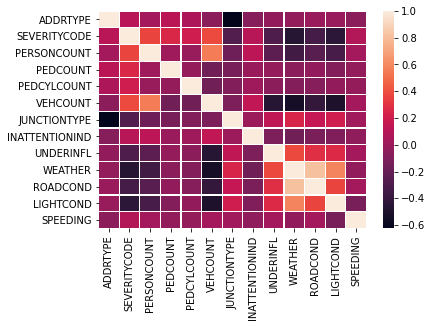

In [139]:
# the correlation heatmap

import seaborn as sns

sns.heatmap(df_coll_pearson.corr(), linewidth=.2, cbar_kws={"shrink": 1})

**Selecting the Features set**

In [140]:
# based on the above observation of the Pearson correlation actually there is nothing to drop as it seems

features = df_coll_clean[['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', \
                          'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', \
                          'LIGHTCOND', 'SPEEDING']]

print("The number of rows and columns in the features set respectively are:", features.shape)
features.head()

The number of rows and columns in the features set respectively are: (221265, 12)


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,1,0,1,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0
1,Intersection,4,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On,0
2,Block,4,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0
3,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Dark - Street Lights On,0
4,Block,0,0,0,0,Mid-Block (but intersection related),0,UN,others,others,others,0


**Specifying the target variable**

In [141]:
target = df_coll_clean['SEVERITYCODE']
print("The number of entries in the target variable is:", target.size)

The number of entries in the target variable is: 221265


# Exploratory Data Analysis

# Data pre-processing and Modelling

# Model Evaluation